Download Count

In [51]:
import sys
sys.path.remove('/home/cheung59/.local/lib/python3.8/site-packages')
# Insert it back but after your virtual environment's site-packages
sys.path.append('/home/cheung59/.local/lib/python3.8/site-packages')

In [52]:
from huggingface_hub import HfApi

model_name = "bert-base-uncased"  # Replace with any model name

api = HfApi()

api.model_info(model_name).downloads


40125353

Model Card

In [53]:
from huggingface_hub.repocard import RepoCard

raw_model_card = RepoCard.load(model_name)

print(raw_model_card.text)


# BERT base model (uncased)

Pretrained model on English language using a masked language modeling (MLM) objective. It was introduced in
[this paper](https://arxiv.org/abs/1810.04805) and first released in
[this repository](https://github.com/google-research/bert). This model is uncased: it does not make a difference
between english and English.

Disclaimer: The team releasing BERT did not write a model card for this model so this model card has been written by
the Hugging Face team.

## Model description

BERT is a transformers model pretrained on a large corpus of English data in a self-supervised fashion. This means it
was pretrained on the raw texts only, with no humans labeling them in any way (which is why it can use lots of
publicly available data) with an automatic process to generate inputs and labels from those texts. More precisely, it
was pretrained with two objectives:

- Masked language modeling (MLM): taking a sentence, the model randomly masks 15% of the words in the i

Config

In [54]:

api.model_info(model_name).config


{'architectures': ['BertForMaskedLM'], 'model_type': 'bert'}

In [55]:
import json
from huggingface_hub import hf_hub_download

download_dir = '.'

hf_hub_download(local_dir=download_dir, repo_id=model_name, filename="config.json")

with open(download_dir + '/config.json') as f:
    config_data = json.load(f)

print(config_data)

{'architectures': ['BertForMaskedLM'], 'attention_probs_dropout_prob': 0.1, 'gradient_checkpointing': False, 'hidden_act': 'gelu', 'hidden_dropout_prob': 0.1, 'hidden_size': 768, 'initializer_range': 0.02, 'intermediate_size': 3072, 'layer_norm_eps': 1e-12, 'max_position_embeddings': 512, 'model_type': 'bert', 'num_attention_heads': 12, 'num_hidden_layers': 12, 'pad_token_id': 0, 'position_embedding_type': 'absolute', 'transformers_version': '4.6.0.dev0', 'type_vocab_size': 2, 'use_cache': True, 'vocab_size': 30522}


Torchview Graph

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


{'input_ids': tensor([[ 101, 3231, 7953,  102]]), 'token_type_ids': tensor([[0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1]])}
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


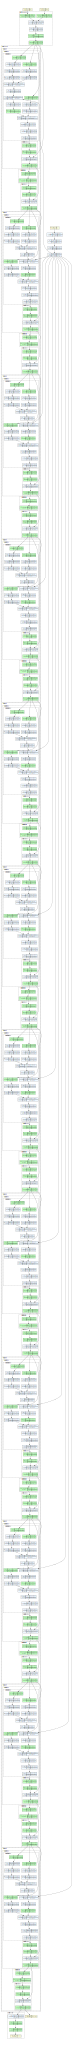

In [68]:
import torchview as tv
from transformers import AutoModel, AutoTokenizer, AutoFeatureExtractor, AutoImageProcessor, AutoProcessor
from PIL import Image
import numpy as np
import pandas as pd

image = Image.new('RGB', (224, 224), color = (0, 0, 0))

fc = 0
inp0, inp1, inp2, inp3, inp4, inp5, inp6, inp7 = None, None, None, None, None, None, None, None
try:
    m = AutoModel.from_pretrained(model_name)
except:
    pass
try:
    t0 = AutoProcessor.from_pretrained(model_name)
    inp0 = t0("Test Input", return_tensors="pt")
except:
    fc += 1
try:
    t1 = AutoTokenizer.from_pretrained(model_name)
    inp1 = t1.encode("Test Input", return_tensors="pt")
except:
    fc += 1
try:
    t2 = AutoImageProcessor.from_pretrained(model_name)
    inp2 = t2(images=image, return_tensors="pt")
except:
    fc += 1
try:
    t3 = AutoFeatureExtractor.from_pretrained(model_name)
    inp3 = t3(images=image, return_tensors="pt")
except:
    fc += 1
try:
    t4 = AutoTokenizer.from_pretrained(model_name)
    input_ids = t4('The <extra_id_0> walks in <extra_id_1> park', return_tensors='pt').input_ids
    attention_mask = input_ids.ne(m.config.pad_token_id).long()
    decoder_input_ids = t4('<pad> <extra_id_0> cute dog <extra_id_1> the <extra_id_2>', return_tensors='pt').input_ids
    inp4 = (input_ids, attention_mask, decoder_input_ids)
except:
    fc += 1
try:
    t5 = AutoTokenizer.from_pretrained(model_name, from_tf=True)
    inp5 = t5.encode("Test Input", return_tensors="pt")
except:
    fc += 1
try:
    t6 = AutoFeatureExtractor.from_pretrained(model_name)
    inp6 = t6(np.random.randn(1, 16000), sampling_rate=16000, return_tensors='pt') # might need to adjust the '16000' if doesn't work
except:
    fc += 1
try:
    t7 = AutoProcessor.from_pretrained(model_name, from_tf=True)
    inp7 = t7(pd.DataFrame(), return_tensors='pt')
except:
    fc += 1


if fc == 8:
    print('Failed to load', model_name)

def draw_graph_helper(inputs):
    model_graph = tv.draw_graph(
        m, inputs,
        graph_name='Graph',
        depth=16, 
        expand_nested=True
    )
    return model_graph

def try_draw_graph(input_list):
    for i in input_list:
        print(i)
        if i == None: continue
        try:
            model_graph = draw_graph_helper(i)
            return model_graph
        except:
            continue
        

try_draw_graph([inp0, inp1, inp2, inp3, inp4, inp5, inp6, inp7]).visual_graph


